### 1 什么是matplotlib

2D、简单、交互、数据可视化

#### 1.1容器层

3）Axes：坐标轴
2）figure（白纸）：需要先实例化
1）canvas（画板）

#### 1.2辅助显示层（类似图例）

#### 1.3图像层

绘制什么图象的声明

### 2 简单实现一个Matplotlib画图

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)
num:图像编号或名称，数字为编号 ，字符串为名称
figsize:指定figure的宽和高，单位为英寸；
dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80      1英寸等于2.5cm,A4纸是 21*30cm的纸张 
facecolor:背景颜色
edgecolor:边框颜色
frameon:是否显示边框

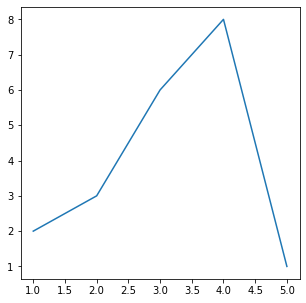

In [1]:
#准备：导入matplotlib
import matplotlib.pyplot as plt
#1.创建画布
plt.figure(figsize=(5,5),facecolor='white',edgecolor='grey')
#2.绘制图像
x=[1,2,3,4,5]
y=[2,3,6,8,1]
#3.显示图像
plt.plot(x,y)#plt.plt(x,y)就不行AttributeError: module ’matplotlib‘ has no attribute ’plt‘
#保存图像
plt.savefig("2.png")
plt.show()#会释放内存，在这之前将图像保存

#### 2.1准备数据并画出初始折线图

eg：显示温度变化状况
显示出某城市11点到12点1小时内每分钟的温度变化折线图，温度在15度到18度随机生成
uniform方法将在 [x,y] 范围内随机生成一个实数，如下
https://www.jb51.net/article/157225.htm
[random.uniform[15,18]for i in x]列表生成式，可以查看如下链接了解
https://blog.csdn.net/qq_40628106/article/details/85039366

#### 2.2添加x，y轴刻度
y_ticks
plt.yticks（）

#### 2.3添加表格

grid（）

#### 2.4添加描述

#### 2.5显示图例

plot(,label=)
legend（）


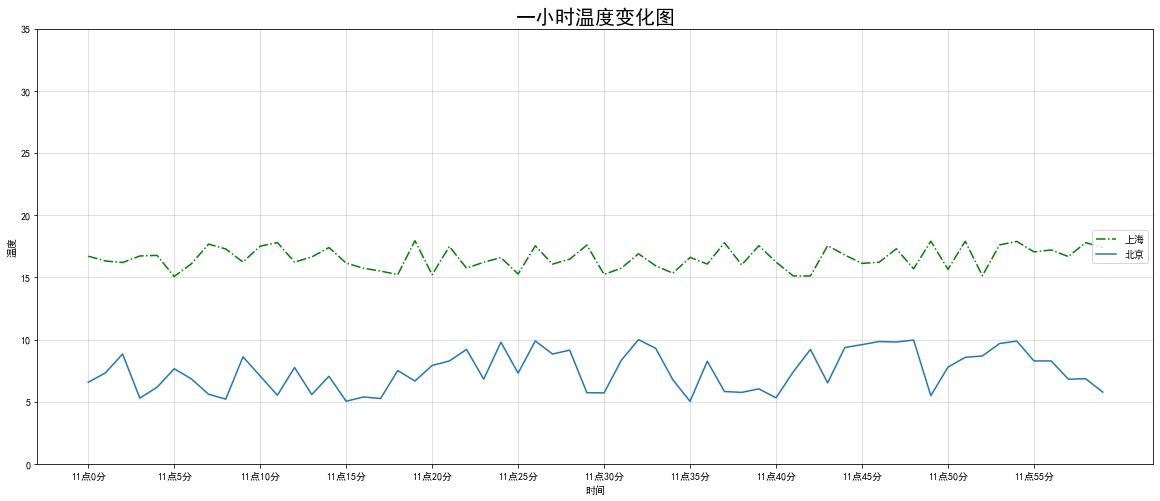

In [2]:
import random
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#准备x，y坐标的数据
x=range(60)
y_shanghai=[random.uniform(15,18)for i in x]
y_beijing=[random.uniform(5,10)for i in x]
#画布
plt.figure(figsize=(20,8),facecolor='white',edgecolor='blue')
#画图(多条)
plt.plot(x,y_shanghai,label="上海",color="g",linestyle="-.")
#color设置线条颜色（绿），linestyle设置线条样式-.
plt.plot(x,y_beijing,label="北京")
#显示图例
plt.legend()
plt.legend(loc=7)
#一张图只有一个图例，loc设置位置
#2.2添加刻度
y_ticks=range(40)
x_ticks_labels=["11点{}分".format(i) for i in x]
plt.yticks(y_ticks[::5])
plt.xticks(x[::5],x_ticks_labels[::5])
#添加网格显示
plt.grid(True,linestyle='-',alpha=0.5)
#2.4
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("一小时温度变化图",fontsize=20)
#展示 
plt.show()

### 3 多个坐标系显示-plt.subplots(面向对象的画图方法)
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
eg:
将上面北京和上海的天气图显示在同一个图的不同坐标系下,如下图所示：
![eg2](imgs/eg2.png)
！markdown语法请看：
https://www.cnblogs.com/keye/p/10483661.html

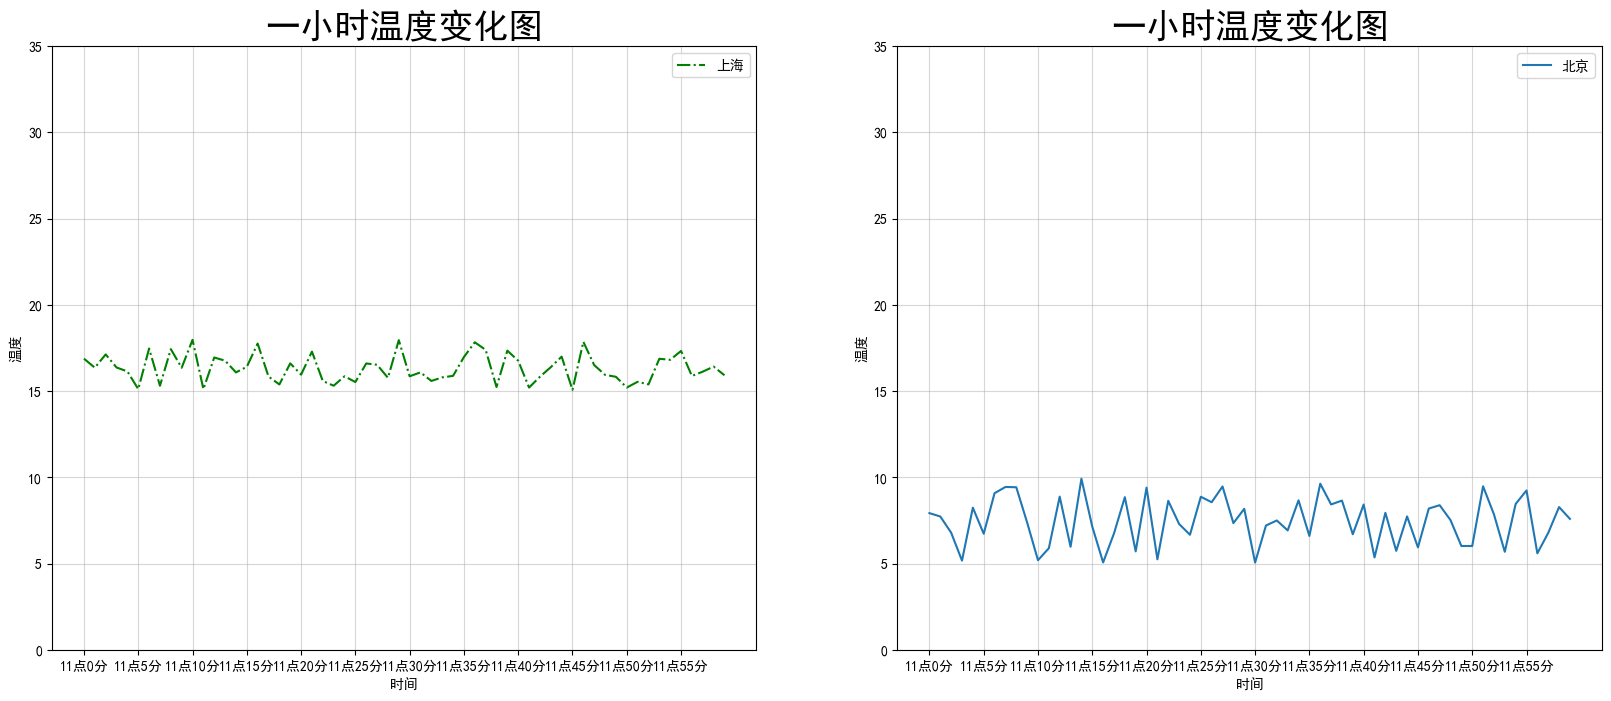

In [3]:
import random
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#准备x，y坐标的数据
x=range(60)
y_shanghai=[random.uniform(15,18)for i in x]
y_beijing=[random.uniform(5,10)for i in x]

#创建画布
#plt.figure(figsize=(20,8),facecolor='white',edgecolor='blue')
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(20,8),dpi=100)

#画图(多条)
#plt.plot(x,y_shanghai,label="上海",color="g",linestyle="-.")
#color设置线条颜色（绿），linestyle设置线条样式-.
#plt.plot(x,y_beijing,label="北京")
axes[0].plot(x,y_shanghai,label="上海",color="g",linestyle="-.")
axes[1].plot(x,y_beijing,label="北京")

#2.2添加刻度
y_ticks=range(40)
x_ticks_labels=["11点{}分".format(i) for i in x]

#plt.yticks(y_ticks[::5])
#plt.xticks(x[::5],x_ticks_labels[::5])
axes[0].set_xticks(x[::5])
axes[0].set_yticks(y_ticks[::5])
axes[0].set_xticklabels(x_ticks_labels[::5])
axes[1].set_xticks(x[::5])
axes[1].set_yticks(y_ticks[::5])
axes[1].set_xticklabels(x_ticks_labels[::5])

#添加网格显示
#plt.grid(True,linestyle='-',alpha=0.5)
axes[0].grid(True,linestyle='-',alpha=0.5)
axes[1].grid(True,linestyle='-',alpha=0.5)

#2.4
axes[0].set_xlabel("时间")
axes[0].set_ylabel("温度")
axes[0].set_title("一小时温度变化图",fontsize=25)
axes[1].set_xlabel("时间")
axes[1].set_ylabel("温度")
axes[1].set_title("一小时温度变化图",fontsize=25)

#显示图例
#plt.legend()
#plt.legend(loc=7)
#一张图只有一个图例，loc设置位置
axes[0].legend(loc=0)
axes[1].legend(loc=0)

#展示 
plt.show()

！快捷键：
同时修改一列文字
如：
```
axes[0].set_xticks(x[::5])
axes[0].set_yticks(y_ticks[::5])
axes[0].set_xticklabels(x_ticks_labels[::5])
```
将其中的下标0改为1：
alt+鼠标右键 鼠标变为加号后，从第一个0后面向下拉，即可对三个0同时修改

### 4 plot绘制数学图像
```
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
Return evenly spaced numbers over a specified interval.
(在start和stop之间返回均匀间隔的数据)
Returns num evenly spaced samples, calculated over the interval [start, stop].
(返回的是 [start, stop]之间的均匀分布)
The endpoint of the interval can optionally be excluded.
Changed in version 1.16.0: Non-scalar start and stop are now supported.
(可以选择是否排除间隔的终点)
start:返回样本数据开始点
stop:返回样本数据结束点
num:生成的样本数据量，默认为50
endpoint：True则包含stop；False则不包含stop
retstep：If True, return (samples, step), where step is the spacing between samples.(即如果为True则结果会给出数据间隔)
dtype：输出数组类型
axis：0(默认)或-1
```

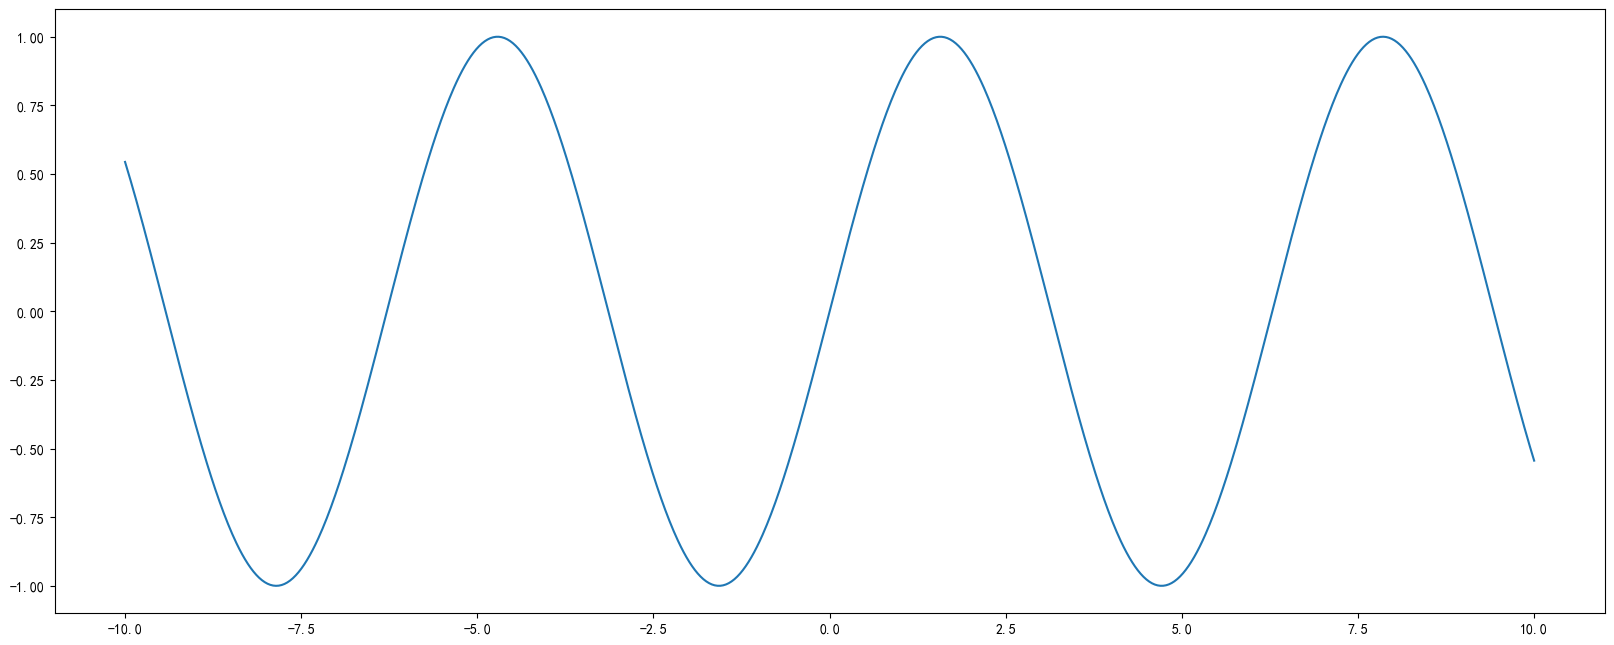

In [4]:
import numpy as np

# 0.生成数据
x= np.linspace(-10,10,1000)#创建等差数列
y=np.sin(x)

plt.figure(figsize=(20,8),dpi=100)
plt.plot(x,y)
plt.show()

### 5 常见图形的绘制
Matplotlib 可以绘制*折线图、散点图、直方图、饼图*
#### 5.1 常见图形种类
折线图：plt.plot(x,y)
散点图：plt.scatter(x,y)

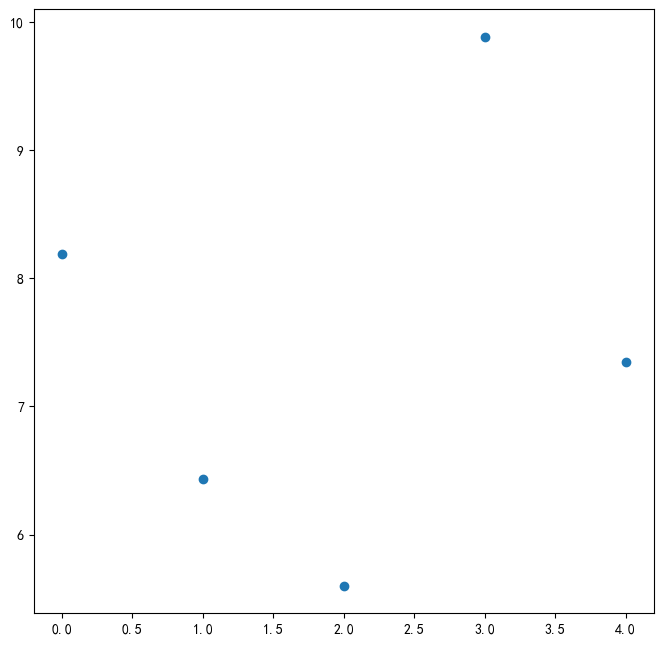

In [5]:
x=range(5)
y=[random.uniform(5,10)for i in x]#x and y must be the same size
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(x,y)
plt.show()

|参数	|说明	|类型 |
|---|---|---|
|x|x坐标	|int,float|
|height	|条形的高度	|int,float|
|width	|宽度	0~1，默认0.8|   |
|botton	|条形的起始位置，也是y轴的起始坐标|   |
|align	|条形的中心位置|“center”,"lege"边缘|
|color     |条形的颜色	|“r","b","g","#123465"，默认“b"|
|edgecolor	 |边框的颜色	|同上|
|linewidth	 |边框的宽度	|像素，默认无，int|
|tick_label	 |下标的标签	|可以是元组类型的字符组合|
|log	    |y轴使用科学计算法表示	|bool|
|orientation  |是竖直条还是水平条	|竖直："vertical"，水平条："horizontal"|


柱状图：bar(x, height, width=0.8, bottom=None, align='center', data=None)

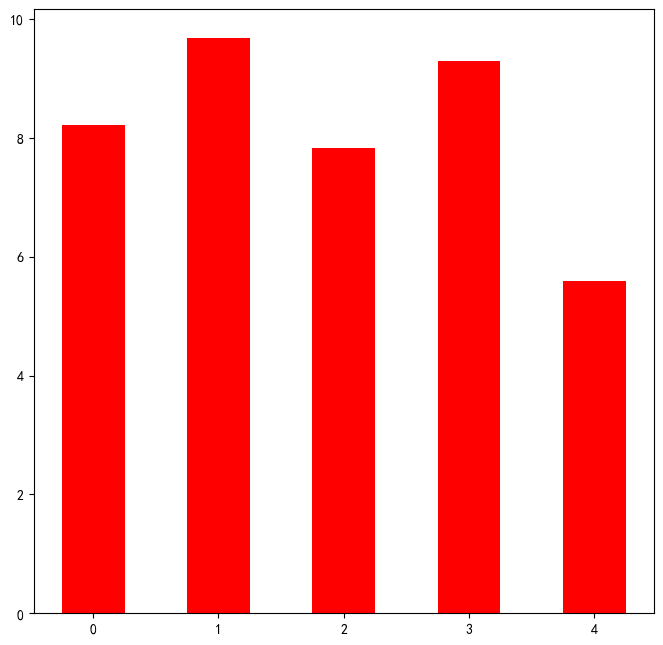

In [8]:
x=range(5)
y=[random.uniform(5,10)for i in x]#x and y must be the same size
plt.figure(figsize=(8,8),dpi=100)
plt.bar(x,width=0.5,height=y,align="center",color="r")
plt.show()

直方图：plt.hist(x,bins=None)

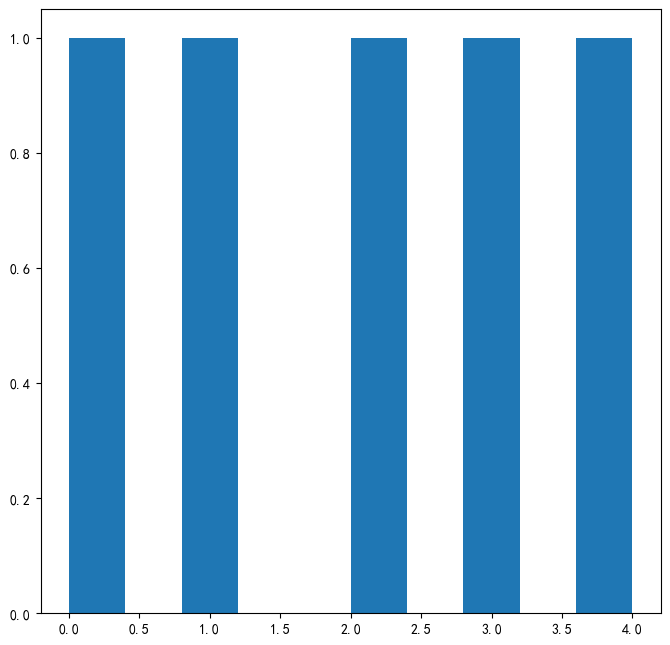

In [11]:
plt.figure(figsize=(8,8),dpi=100)
plt.hist(x,bins=None)
#plt.hist(x)
plt.show()

饼图：plt.pie(x,labels=,autopct=,colors)
```
x       :(每一块)的比例，如果sum(x) > 1会使用sum(x)归一化；
labels  :(每一块)饼图外侧显示的说明文字；
explode :(每一块)离开中心距离；
startangle :起始绘制角度,默认图是从x轴正方向逆时针画起,如设定=90则从y轴正方向画起；
shadow  :在饼图下面画一个阴影。默认值：False，即不画阴影；
labeldistance :label标记的绘制位置,相对于半径的比例，默认值为1.1, 如<1则绘制在饼图内侧；
autopct :控制饼图内百分比设置,可以使用format字符串或者format function
        '%1.1f'指小数点前后位数(没有用空格补齐)；
pctdistance :类似于labeldistance,指定autopct的位置刻度,默认值为0.6；
radius  :控制饼图半径，默认值为1；counterclock ：指定指针方向；布尔值，可选参数，默认为：True，即逆时针。将值改为False即可改为顺时针。wedgeprops ：字典类型，可选参数，默认值：None。参数字典传递给wedge对象用来画一个饼图。例如：wedgeprops={'linewidth':3}设置wedge线宽为3。
textprops ：设置标签（labels）和比例文字的格式；字典类型，可选参数，默认值为：None。传递给text对象的字典参数。
center ：浮点类型的列表，可选参数，默认值：(0,0)。图标中心位置。
frame ：布尔类型，可选参数，默认值：False。如果是true，绘制带有表的轴框架。
rotatelabels ：布尔类型，可选参数，默认为：False。如果为True，旋转每个label到指定的角度。
```

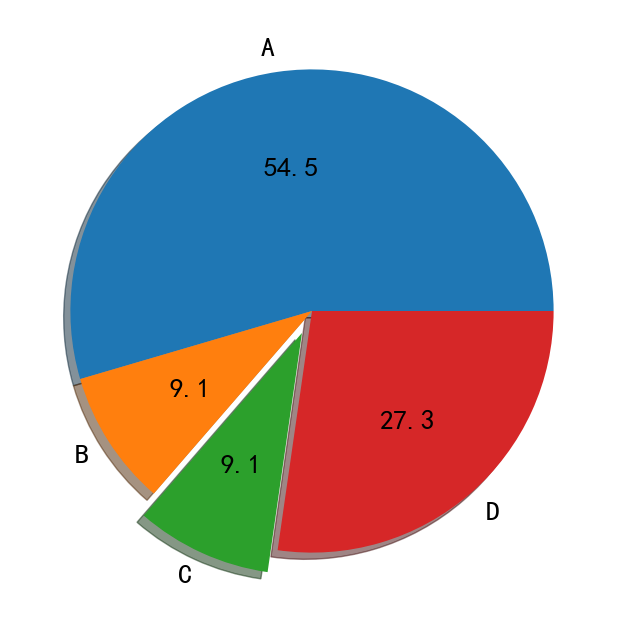

In [24]:
plt.figure(figsize=(8,8),dpi=100)
label=["A","B","C","D"]
x=[60,10,10,30]
plt.pie(x,labels=label,explode=(0,0,0.1,0),shadow=True,autopct='%1.1f',textprops={'fontsize':20,'color':'black'})
#plt.hist(x)
plt.show()